# Reto: explora diferentes ejemplos de modelos y qué pueden hacer

#### Natasha Seelam, PhD
#### Head of AI/ML Research @ MindsDB

**Agradecimientos especiales: Dr. Dariusz K. Murakowski**

---

En esta notebook aprenderás la base del uso de diferentes algoritmos básicos de machine learning. 

Para esta clase usaremos la librería [scikit-learn](https://scikit-learn.org/stable/), una de las librerías más sencillas de utilizar para aprender machine learning.

Para los siguientes ejemplos, usaremos los argumentos predeterminados. En la práctica, deberás ajustar los parámetros. Recuerda consultar todas las páginas de documentación de cada uno de los modelos:

* Regresión lineal: [aquí](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html?highlight=linear%20regression#sklearn.linear_model.LinearRegression)
* Regresión logística: [aquí](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logistic%20regression#sklearn.linear_model.LogisticRegression)
* Clasificador de bosque aleatorio (árboles de decisión): [aquí](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=randomforest#sklearn.ensemble.RandomForestClassifier)

Recuerda que en los siguientes cursos de machine learning de la Escuela de Ciencia de Datos e Inteligencia Artificial aprenderás a mayor detalle a usar estos algoritmos y librerías. ¡Comencemos con las bases!

In [1]:
pip install numpy pandas scikit-learn matplotlib yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Importamos librerías de manejo numérico y procesamiento de datos.
import numpy as np
import pandas as pd

# Importamos scikit-learn, nuestra librería base para utilizar algoritmos de machine learning.
import sklearn

#Importamos los datasets de scikit-learn
from sklearn import datasets

# Importamos librerías de scikit-learn para manejo de regresión lineal/logística.
from sklearn import linear_model

# Importamos librerías de scikit-learn para uso de clasificación de bosque aleatorio.
from sklearn.ensemble import RandomForestClassifier

# Importamos librerías de scikit-learn para clusterización con k-means
from sklearn.cluster import KMeans

# Importamos librerías para manejo del rendimiento (performance) de nuestros modelos.
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

# Importamos librerías para graficar.
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Definimos el tamaño del graficado (opcional).
plt.rcParams['font.size']=15

Para este ejemplo usaremos el [Iris dataset](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html). Contiene datos de dimensiones de partes de flores.

El Iris dataset es uno de los fundamentales para aprender machine learning y podemos considerarlo como un dataset de "juguete" porque sus datos se encuentran muy limpios, lo que facilita su uso para nuestro aprendizaje inicial. 

Iris dataset puede ser descargado automáticamente del módulo ```datasets``` de scikit-learn de la siguiente manera:

In [3]:
# Carga del Iris dataset.
iris = datasets.load_iris()

# Imprimimos los datos.
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

## 1: Familiarizarse con tu conjunto de datos

Inspeccionando los elementos parece que los "datos" contienen la información que necesitamos. Están en la forma de array, típicamente denotado $N \times M$ donde $N$ representa el número de filas (150), y $M$ el número de columnas (4).

La clave `feature_names` indica la información de las características: largo del sépalo, ancho del sépalo, largo del pétalo y ancho del pétalo.

El término "target", salida u objetivo es típicamente la meta que queremos modelar. La clave `target_names` indica 3 especies de esta flor: "setosa", "versicolor" y "virginica".

Nuestra meta es usar estos features y descripciones de las flores para poder predecir la especie de la planta.

Para comenzar llevemos estos datos a un DataFrame en Pandas:

In [4]:
# Creamos el DataFrame con los feature names.
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Creamos el DataFrame con los targets (las especies de la flor).
target = pd.DataFrame(data=iris.target, columns=['species'])

# Unimos ambos DF con concat; agregamos una nueva columna.
data = pd.concat([data, target], axis=1)

# Mezclar en orden aleatorio.
data = data.sample(frac=1, random_state=1234)

# Imprimimos los primeros registros del nuevo DataFrame.
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
91,6.1,3.0,4.6,1.4,1
63,6.1,2.9,4.7,1.4,1
103,6.3,2.9,5.6,1.8,2
6,4.6,3.4,1.4,0.3,0
59,5.2,2.7,3.9,1.4,1


### 1a: Separando nuestros datos - training y testing

Antes de comenzar a crear modelos, es importante dividir nuestro conjunto de datos en **Entrenamiento (Training)** y **Pruebas (Testing)**.

Una buena regla general es que la mayoría de los datos deben incluirse en **entrenamiento**. Los datos de entrenamiento se utilizan para ayudar a nuestros modelos a aprender las "reglas" o patrones subyacentes dentro de los datos.

El conjunto de **pruebas** debe separarse del conjunto de entrenamiento. Su objetivo es evaluar el modelo que hizo, lo que significa que verificamos si los patrones detectados en el modelo reflejan lo que estamos tratando de modelar.

También recordemos que existe el término **Validación (Validation)**. Esta separación del dataset se usa típicamente para modelos más complicados donde se requieren parámetros de ajuste (o los elementos clave) de un modelo. En el siguiente caso estos modelos son lo suficientemente simples como para que datos de validación no sean necesaria.

Una división del 80/20 por ciento de entrenamiento/pruebas suele ser razonable de manera elemental. Realizamos esto:

In [5]:
# Fracción de entrenamiento 0.8.
Ntrain = int(data.shape[0] * 0.8)

# Datos de entrenamiento.
train = data.iloc[:Ntrain, :]

# Datos de prueba.
test = data.iloc[Ntrain:, :]

## 2: Regresión lineal

La regresión lineal intenta predecir una salida de valor numérico. La especie de la flor es una etiqueta o label. Así que intentemos pensar en un modelo en el que podamos predecir la salida de un número.


Para este ejemplo, supongamos que queremos predecir **petal width** o ancho del pétalo (Index = 3 en el DataFrame).

Para comenzar, construyamos un modelo con solo 1 feature, el **petal length** o largo del pétalo (Index = 2 en el DataFrame).


Primero, observemos la relación entre **petal length** y **petal width** en los datos:

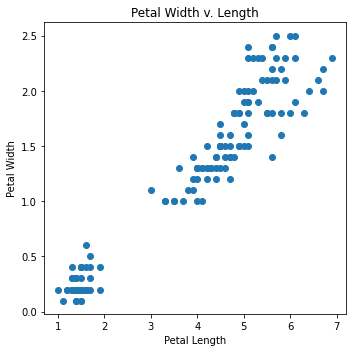

In [6]:
# Definimos variables para acceder de forma más simple a las columnas de nuestros features.
plength = data["petal length (cm)"]
pwidth = data["petal width (cm)"]

# Creamos la gráfica comparanco Petal lenght (eje x) contra Petal width (eje y)
f = plt.figure(figsize=(5,5))
ax = f.add_subplot(1,1,1)
ax.scatter(plength, pwidth)
ax.set_xlabel("Petal Length")
ax.set_ylabel("Petal Width")
ax.set_title("Petal Width v. Length")
f.tight_layout()

De lo anterior, podemos ver una relación **lineal**. Queremos cuantificar esta relación.

En la gráfica anterior $x$ es el Petal Lenght y $y$ es el Petal Width. Queremos ajustar un modelo a la forma
$\theta_1*x + \theta_0 = y$, la ecuación de la recta para generar nuestra regresión lineal.

Podemos utilizar scikit-earn para construir un modelo de regresión lineal como tenemos a continuación:



**NOTA:** aparecerá un molesto mensaje de error ya que scikit-learn espera un input 2D (N x 1) por eso llamamos "DataFrame" en el x-input para ajustar el comando.

In [7]:
# Importar un objeto de regresión lineal de sklearn.
model_1 = linear_model.LinearRegression()

# Ajustar el modelo a tus datos.
model_1.fit(pd.DataFrame(train.iloc[:, 2]), train.iloc[:, 3])

# Imprimir los coeficientes.
print("Coef\n", model_1.coef_)

# Imprimir el sesgo o bias.
print("\n\nBias\n", model_1.intercept_)

Coef
 [0.41490802]


Bias
 -0.357589314248546


El resultado anterior nos dice que $\theta_1$, la relación con el largo del pétalo, es $0.41$, y que el bias (también llamado interceptar) es $-0.36$

$\theta_1 * x + \theta_0 = 0.41*x - 0.36 = y$ <br>

Grafiquemos esto para observarlo:

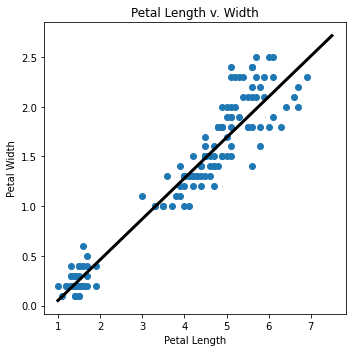

In [8]:
# Definimos variables para acceder de forma más simple a las columnas de nuestros features.
plength = data["petal length (cm)"]
pwidth = data["petal width (cm)"]

# Definimos un arreglo desde el valor mímimo del petal length hasta el máximo del petal lenght + 1, en pasos de 0.5.
xvals = np.arange(plength.min(), plength.max()+1, 0.5)

# Ecuación de nuestra regresión lineal.
yvals = 0.41*xvals - 0.36

# Gráficamos nuestra recta con los datos y nuestra ecuación.
f = plt.figure(figsize=(5,5))
ax = f.add_subplot(1,1,1)
ax.scatter(plength, pwidth)
ax.plot(xvals, yvals, 'k', linewidth=3)
ax.set_xlabel("Petal Length")
ax.set_ylabel("Petal Width")
ax.set_title("Petal Length v. Width")
f.tight_layout()

¡No es una mala relación! Podemos dar un paso más para cuantificar "qué tan bueno es el ajuste" utilizando dos métricas de rendimiento: el error cuadrático medio (MSE) y $R^2$.

El valor de $R^2$ busca la correlación entre $x$ y $y$. Para este caso pregunta "qué tan bien se ajusta la línea a los puntos de nuestros datos".

Siempre queremos un MSE bajo y $R^2$ cercano a 1. $R^2$ está limitado de $0$ (efectivamente no correlacionado) a $1$ (relación perfecta).

Podemos calcular nuestras métricas de rendimiento prediciendo primero en nuestro **conjunto de datos de pruebas** y luego viendo qué tan buena es la estimación de nuestro modelo del ancho del pétalo cuando se usa la longitud del pétalo, en comparación con los valores reales del ancho del pétalo.

In [23]:
# Predicción con model_1 = linear_model.LinearRegression() utilizando los datos de prueba.
ypredict = model_1.predict(pd.DataFrame(test.iloc[:, 2]))

# Calculamos el MSE con los valores predichos en y.
print('MSE: %.2f'
      % mean_squared_error(pd.DataFrame(test.iloc[:, 3]), ypredict))

# Calculamos R^2 con los valores predichos en y.
print('R2: %.2f'
      % r2_score(pd.DataFrame(test.iloc[:, 3]), ypredict))

MSE: 0.04
R2: 0.94


¡Excelente! Podemos ver que existe una relación decente entre la longitud y el ancho de los pétalos.

## 3: Regresión logística

Similar a la regresión lineal, la regresión logística ajusta una "línea" con los coeficientes. Sin embargo, a diferencia de la regresión lineal, este modelo tiene como objetivo **clasificar datos**.

A partir del ancho de los pétalos, podemos ver que hay 3 comportamientos distintos de cada una de las especies de flores. Usando el largo/ancho del sépalo y el largo/ancho del pétalo, nos gustaría clasificar a qué especie de flor pertenece cada punto de datos.

Para hacer esto podemos emplear regresión logística. En la regresión logística binaria, estamos tratando de ajustar un logaritmo de relación impar; es decir, una probabilidad de una clase particular en relación con la otra clase.

En este problema hay 3 especies, por lo que la fórmula está ligeramente adaptada. Afortunadamente, scikit-learn puede manejar problemas de etiquetas binarias o de etiquetas múltiples con mucha facilidad.

Para construir un modelo de regresión logística se puede utilizar lo siguiente:

In [24]:
# Preparamos los datos de entrenamiento y prueba en x y y.
# La última columna es la etiqueta de la especie..
xtrain = train.iloc[:, :-1] # input, training
ytrain = train.iloc[:, -1] # output, training
xtest = test.iloc[:, :-1] # input, test
ytest = test.iloc[:, -1] # output, test

# Configuramos la regresión logística con el método de regresión logística de linear_model.
model_2 = linear_model.LogisticRegression()

# Ajustamos el modelo con los datos de entrenamiento.
model_2.fit(xtrain, ytrain)

/home/mazzaroli/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

La evaluación de la regresión logística utilizará **precisión (accuracy)**, o un recuento de la cantidad de veces que el modelo etiqueta correctamente un ejemplo.

Lo podemos hacer de la siguiente manera:

In [25]:
# Hacer predicciones con el conjunto de prueba.
ypred = model_2.predict(xtest)

# Probamos el accuracy del modelo generado
print("Testing accuracy =", accuracy_score(ytest, ypred))

Testing accuracy = 1.0


¡Increíblemente, nuestro modelo pudo obtener todos los ejemplos correctamente!

Tal hazaña solo puede ocurrir si el conjunto de prueba de los datos es *separable linealmente*, una condición especial en la que es realmente fácil agrupar los datos, o una línea (o plano) dibujada puede separar completamente entre todas las muestras de diferentes clases. 

En problemas más complicados, es posible que necesites verificar la [*matriz de confusión*](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) preguntando cuáles son los verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos. Puedes hacer esto usando la matriz de confusión de scikit-learn de la siguiente forma:

In [26]:
# Un ejemplo de la matriz de confusión con sklearn
#Importamos el método de matriz de confusión desde sklearn
from sklearn.metrics import confusion_matrix

#Aplicamos la matriz a nuestros valores de testing y los valores de predicción generados.
confusion_matrix(ytest, ypred)

array([[11,  0,  0],
       [ 0,  7,  0],
       [ 0,  0, 12]])

Ten en cuenta que, dado que hay 3 clases, cada columna y fila individual corresponde a una clase. Las columnas corresponden a las etiquetas predichas y las filas a las etiquetas verdaderas.

### 3a: Regresión logística - regularización (bonus)

Vale la pena mirar los [argumentos predeterminados](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) de ```LogisticRegression``` de scikit-learn. A saber, una cosa a buscar son los términos de **regularización** y **penalización**.

La **regularización**, aunque no se trata en el curso, tiene la intención de ayudar a los modelos asegurándose de que no se ajusten demasiado. Al agregar un nuevo término a la función de pérdida, el modelo penalizará el tamaño de cada coeficiente en el modelo.

El **sobreajuste** u **overfitting** significa que el modelo funcionará fantásticamente en el conjunto de entrenamiento, pero horriblemente en el conjunto de prueba (o el de validación). La regularización intenta hacer que los coeficientes de las características redundantes/no útiles sean lo más cercanos a 0 como sea posible, lo que significa que juegan un papel pequeño en la predicción.

En scikit-learn, `penalty`  o penalización se refiere al tipo de regularización, normalmente **L1** or **L2**. Ambos métodos fomentan la escasez (lo que significa que muchos de los coeficientes delante de las características se acercan a 0). Además, la fuerza de la penalización inversa (regularización) es `C`. Una `C` grande indica una menor fuerza de penalización, así que disminuye gradualmente este valor mientras intentas encontrar los features más importantes.

## 4. Bosque aleatorio (árboles de decisión)

El último enfoque que analizaremos es el bosque aleatorio. Como estamos tratando de etiquetar entre especies, usaremos un Clasificador de bosque aleatorio como se ve [aquí](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=randomforest#sklearn.ensemble.RandomForestClassifier). También hay un Random Forest [regressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html?highlight=randomforest#sklearn.ensemble.RandomForestRegressor) o regresor de bosque aleatorio. 

Bosque aleatorio tiene varios argumentos de entrada. Por simplicidad solo agregamos los estimadores `n_estimators`. Corresponden al número de árboles en el bosque.

In [29]:
# Creamos el clasificador
clf = RandomForestClassifier(n_estimators=3)

# Entrenamos el modelo
clf.fit(xtrain, ytrain)

# Generamos predicción 
y_pred=clf.predict(xtest)

# Probamos el modelo con accuracy
print("Testing accuracy =", accuracy_score(ytest, ypred))

Testing accuracy = 1.0


Dado este dataset de "juguete", el modelo es capaz de conseguir perfección en la prueba de accuracy (100% o 1). 

Con datos de un caso real y menos "perfecto" esto no pasaría, pero si buscaríamos que se acerque lo más a 1.

## 5. K-Means clustering

En el último enfoque, intentaremos ver si podemos ver patrones dentro de los datos usando KMeans. KMeans es un algoritmo de aprendizaje no supervisado, lo que significa que no se requieren etiquetas para entrenar.

Aquí, ya sabemos que hay 3 especies diferentes de flores, y hemos tenido muchos modelos de entrenamiento exitosos para reconocer estas especies. Sin embargo, en muchos problemas, es posible que no sepamos de antemano qué grupos pueden existir ya en los datos.

Para ello, KMeans sobresale. A continuación, usaremos un modelo de K-medias e intentaremos encontrar cuántos grupos hay.

Primero, inicializamos nuestro modelo KMeans. Existen muchos argumentos en la implementación de scikit-learn [aquí](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html). Mientras que usaremos los por defecto, el principal a tomar en cuenta es `n_clusters` o cuántos grupos pensamos de antemano que hay en los datos. También usaremos `random_state`, pero eso es para asegurar la reproducibilidad.

Ten en cuenta que usaremos el conjunto de datos completo aquí, pero es posible encajar en un conjunto de entrenamiento y usar un conjunto de pruebas por separado para ver qué tan "robustos" son los clústeres.

Para simplificar la visualización, entrenaremos con `petal length` and `petal width`.

In [34]:
# Inicializamos el modelo KMeans.
k2model = KMeans(n_clusters=2, random_state=42)

# Ajustar todos los puntos de datos EXCEPTO para la especie.
k2model.fit(data[["petal length (cm)", "petal width (cm)"]])

# Calculamos e imprimimos la inercia desde el modelo de Kmeans.
print("Inertia =", k2model.inertia_)

# Cálculamos e imprimimos la posición de los clústers.
print("Centroids (x, y) =\n", k2model.cluster_centers_)

Inertia = 86.39021984551397
Centroids (x, y) =
 [[1.49215686 0.2627451 ]
 [4.92525253 1.68181818]]


Primero, visualicemos estos centros de clústeres en un diagrama de dispersión de los puntos de datos. 

Antes de trazar los centros de los clústers primero trazaremos los puntos de datos.Para mayor claridad, también los colorearé de acuerdo con las etiquetas. ***NOTA, los modelos entrenaron SIN conocer estas etiquetas***.

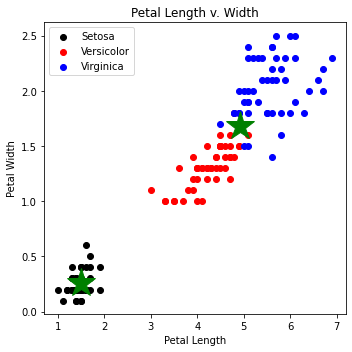

In [35]:
# Graficamos los datos con la línea para setosa.
f = plt.figure(figsize=(5,5))
ax = f.add_subplot(1,1,1)

# Setosa
ax.scatter(data[data.iloc[:, -1]==0]["petal length (cm)"],
           data[data.iloc[:, -1]==0]["petal width (cm)"],
           c='k')

# Versicolor
ax.scatter(data[data.iloc[:, -1]==1]["petal length (cm)"],
           data[data.iloc[:, -1]==1]["petal width (cm)"],
           c='r')

# Virginica
ax.scatter(data[data.iloc[:, -1]==2]["petal length (cm)"],
           data[data.iloc[:, -1]==2]["petal width (cm)"],
           c='b')

ax.legend(["Setosa", "Versicolor", "Virginica"])

# Graficamos los centroides de los clústers (output en Petal Length x Petal Width)
ax.plot(k2model.cluster_centers_[:,0],
        k2model.cluster_centers_[:,1],
        "g*", markersize=30)

ax.set_xlabel("Petal Length")
ax.set_ylabel("Petal Width")
ax.set_title("Petal Length v. Width")
f.tight_layout()

No está mal, nuestro modelo pareció captar el clúster inferior, pero debido a que solo especificamos 2 clústers, parece que perdemos la diferencia entre Versicolor y Virginica. El modelo coloca apropiadamente un centroide entre ellos.

En la práctica, es posible que no tengas las etiquetas disponibles como las tenemos aquí. Entonces, para poder identificar cómo elegir el mejor "*k*", usaremos un **diagrama de codo** tratando de ajustar un modelo para muchos *k*s diferentes en un panel pequeño. Trazamos un diagrama de codo típicamente con inercia en el eje y, y el número de grupos en el eje x. La inercia puede ser recuperada por el modelo como se ve en las 2 celdas de código arriba; mide qué tan lejos están los puntos de datos de sus centros de conglomerados más cercanos. Idealmente, los modelos con menor inercia son mejores; sin embargo, con más grupos, la inercia a menudo seguirá disminuyendo marginalmente. Por lo tanto, el diagrama de codo nos dice el mejor número de conglomerados que debemos tener para aprovechar al máximo la inercia.

In [69]:
from yellowbrick.cluster import KElbowVisualizer

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

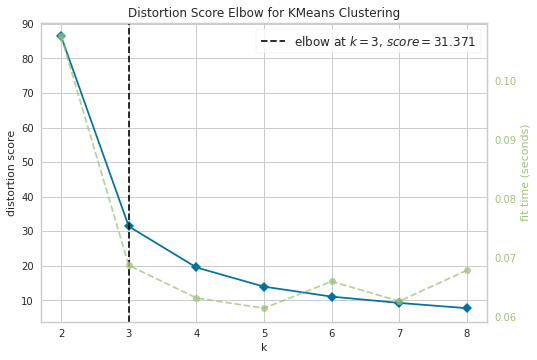

In [100]:
kmodel = KMeans(random_state=42)

visualizer = KElbowVisualizer(kmodel, k=(2,9))

visualizer.fit(data[["petal length (cm)", "petal width (cm)"]]);
visualizer.show();


Implementando el diagrama de codo podemos ver que los cluster optimos podria ser de un k igual a 3

## 6: Conclusiones

En esta notebook hemos cubierto lo esencial de diferentes modelos de machine learning usando scikit-learn:
* Regresión lineal - (supervisado, regresión).
* Regresión logística - (supervisado, clasificación).
* Bosques aleatorios (Random Forest) - (supervised, clasificación).
* K-Means - (no supervisado, clustering)

En los datos con los que puedes trabajar en el futuro es posible que las respuestas no sean tan claras. Es importante probar muchos modelos y sondear realmente tu conjunto de datos para preguntar si las métricas de rendimiento realmente indican si los modelos están aprendiendo como se esperaría.